<a href="https://colab.research.google.com/github/Sury5000/NewsArticle/blob/main/NewsArticles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
import pandas as pd
import urllib.parse

# Define your API key and endpoint
api_key = "b95031dc594a41c7b9cf30e80b487004"  # Replace with your actual API key
api_url = "https://newsapi.org/v2/everything"  # Replace with the correct API endpoint

# Define the genres and their corresponding search keywords
genres = {
    'sports': 'sports',
    'technology': 'technology',
    'politics': 'politics',
    'business': 'business',
    'entertainment': 'entertainment',
    'health': 'health',
    'science': 'science'
}

# Create an empty list to store all the articles
all_articles = []

# Loop through each genre and fetch articles
for genre, keyword in genres.items():
    # URL encode the keyword
    encoded_keyword = urllib.parse.quote(keyword)

    # Define the parameters for the API request
    params = {
        'q': encoded_keyword,       # Search query for the genre
        'pageSize': 100,            # Limit to 100 articles per genre
        'apiKey': "b95031dc594a41c7b9cf30e80b487004",          # Your API key
        'language': 'en',           # Optional: Fetch articles in English
        'sortBy': 'publishedAt'     # Sort articles by publication date
    }

    # Send a GET request to the API
    response = requests.get(api_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Convert response to JSON
        articles = data.get('articles', [])  # Extract articles

        # Add the articles to the all_articles list with genre info
        for article in articles:
            article['genre'] = genre  # Add the genre/category to the article data
            all_articles.append(article)
    else:
        print(f"Failed to retrieve data for genre: {genre} (Status Code: {response.status_code})")
        print(response.text)  # Print the error details

# Convert the list of articles into a DataFrame for easy processing
df = pd.DataFrame(all_articles)

# Print the first few rows to inspect
print(df.head())

# Save the data to a CSV file for future use
df.to_csv('news_articles_all_genres.csv', index=False)


                                    source             author  \
0  {'id': None, 'name': 'Dealcatcher.com'}               None   
1       {'id': None, 'name': 'PhoneArena'}  Polina Kovalakova   
2   {'id': 'fox-news', 'name': 'Fox News'}        Ryan Gaydos   
3  {'id': None, 'name': 'KicksOnFire.com'}        Kicksonfire   
4  {'id': None, 'name': 'KicksOnFire.com'}        Kicksonfire   

                                               title  \
0  Amazon - Sweetcrispy Puppy Pads Dogs Training ...   
1  Samsung's superb Galaxy Tab S9 gets another ge...   
2  Chiefs begin quest for 3 straight Super Bowl t...   
3       Adidas Samba Adv Wmns Core Black / Grey Four   
4  Adidas The Velosamba Made With Nature Cycling ...   

                                         description  \
0  Save on this Sweetcrispy Puppy Pads Dogs Train...   
1  Get the 128GB Galaxy Tab S9 in Graphite for $1...   
2  The Kansas City Chiefs' quest for three consec...   
3  The Adidas Samba Adv WMNS Core Black / Grey F

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
18/18 - 8s - 422ms/step - accuracy: 0.1393 - loss: 3.3369 - val_accuracy: 0.1500 - val_loss: 3.0199
Epoch 2/30
18/18 - 1s - 74ms/step - accuracy: 0.2964 - loss: 2.7944 - val_accuracy: 0.1286 - val_loss: 2.6014
Epoch 3/30
18/18 - 2s - 91ms/step - accuracy: 0.3643 - loss: 2.4282 - val_accuracy: 0.1286 - val_loss: 2.3376
Epoch 4/30
18/18 - 3s - 176ms/step - accuracy: 0.3500 - loss: 2.1673 - val_accuracy: 0.2214 - val_loss: 2.1773
Epoch 5/30
18/18 - 1s - 81ms/step - accuracy: 0.4911 - loss: 1.9428 - val_accuracy: 0.2071 - val_loss: 2.0563
Epoch 6/30
18/18 - 3s - 141ms/step - accuracy: 0.4196 - loss: 1.8016 - val_accuracy: 0.2786 - val_loss: 1.9944
Epoch 7/30
18/18 - 1s - 75ms/step - accuracy: 0.5179 - loss: 1.5930 - val_accuracy: 0.2643 - val_loss: 1.9392
Epoch 8/30
18/18 - 1s - 72ms/step - accuracy: 0.5375 - loss: 1.4385 - val_accuracy: 0.2071 - val_loss: 2.0188
Epoch 9/30
18/18 - 3s - 143ms/step - accuracy: 0.6071 - loss: 1.2700 - val_accuracy: 0.2429 - val_loss: 1.8909
Epoch 

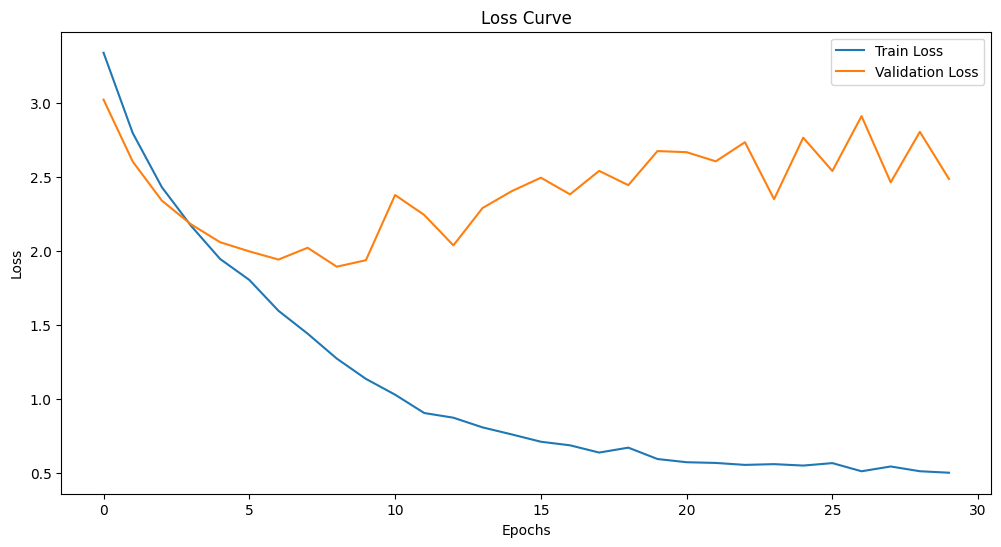

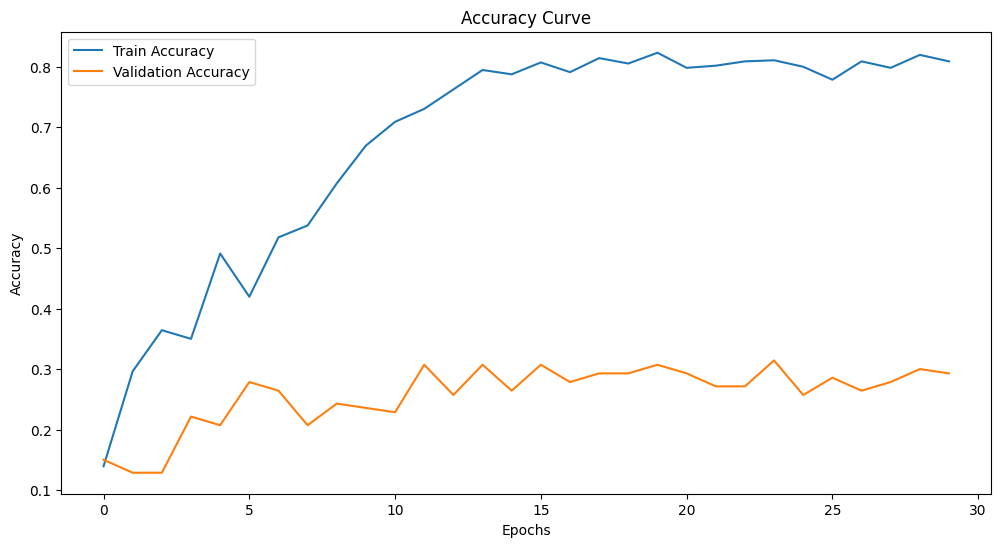

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


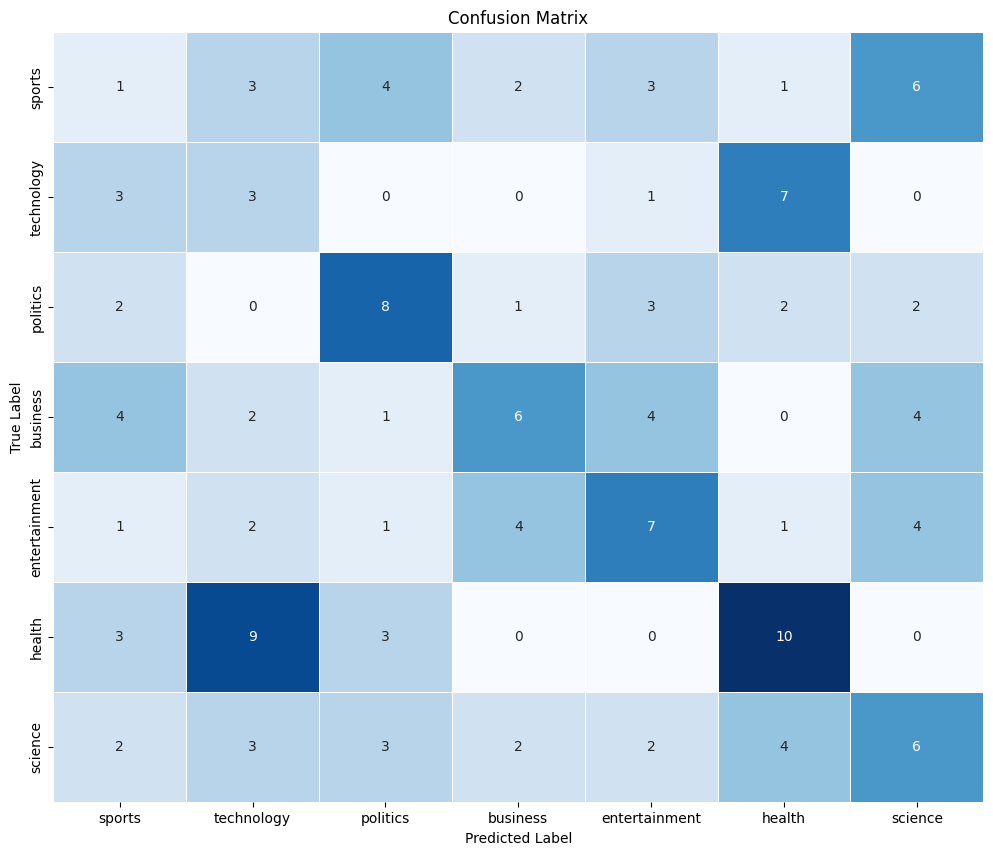

In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# Load the data
data = pd.read_csv('news_articles_all_genres.csv')

# Extract text and labels
text = data['title']  # Or 'description' if you prefer
genre = data['genre']

# Tokenize the text
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
X_sequences = tokenizer.texts_to_sequences(text)
X_padded = pad_sequences(X_sequences, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(genre)
y_one_hot = tf.keras.utils.to_categorical(y_encoded)

# Save tokenizer and label encoder
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_one_hot, test_size=0.2, random_state=42)


# Define the model with L2 regularization
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, kernel_regularizer=l2(0.01)),  # L2 regularization
    Dropout(0.5),
    Dense(len(genres), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Save the model weights
model.save_weights('lstm_model.weights.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy}")
print(f"Validation Loss: {loss}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot back to single class indices
true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Replace these with your actual genre labels
genre_labels = list(genres.keys())

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(conf_mat, index=genre_labels, columns=genre_labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
